In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets

%matplotlib inline
plt.style.use('seaborn-white')

In [29]:
#Load the diabetes dataset. In this case we will not be using a constant intercept feature
diabetes = datasets.load_diabetes()

print(diabetes['DESCR'])

X = diabetes.data
y = diabetes.target.reshape(-1,1)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [30]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    
def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)

            # thresholding
            theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

(0.06309573444801933, 1584.893192461114, -849.8147108555953, 820.6104516733536)

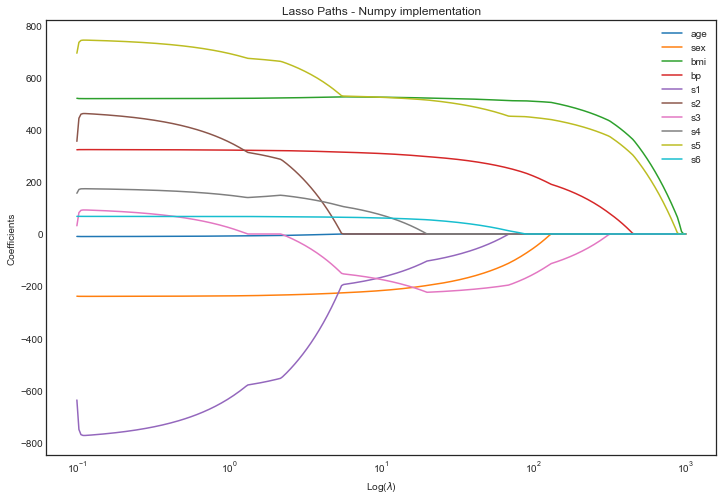

In [36]:
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [39]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# fit the model
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.4, random_state=0)

model = LinearRegression()

model.fit(trainX, trainY)

trainPredictions = model.predict(trainX)

# print quality metrics
print('The r^2 score is', model.score(trainX, trainY))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))
    
# return the predicted outputs for the datapoints in the test set
testPredictions = model.predict(testX)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, testPredictions))

The r^2 score is 0.5791093300283947
The mean absolute error on the training set is 42.03036608230954
The mean absolute error on the test set is 45.556752265853916


In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv = 5)
print(scores)

print(scores.mean(), 'accuracy with a standard deviation of', scores.std())

[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
0.48231812211149394 accuracy with a standard deviation of 0.04926619776563209


In [45]:
X.shape[0]

442